In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude

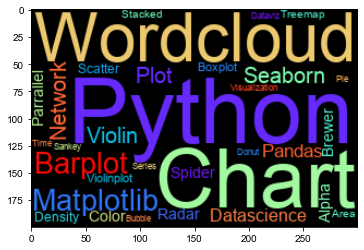

In [34]:
# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

wc = WordCloud(width=300,height=200,colormap='rainbow',font_path='Arial')
wc.generate(text)

plt.imshow(wc,interpolation='bilinear')
wc.to_file('test.png')
plt.show()

In [5]:
def plotWordCloud(wc, dpi=100,ratio=1.39,bkcolor='w'):
    array_wc=wc.to_array()
    ratio_fontsize=ratio/(dpi/100)
    figwidth,figheight=array_wc.shape[1],array_wc.shape[0]
    fig=plt.figure(figsize=(figwidth/dpi, figheight/dpi),dpi=dpi,facecolor=bkcolor)
    ax=plt.gca()
    ax.axis('scaled')
    ax.set_xlim(0,figwidth)
    ax.set_ylim(0,figheight)
    ax.invert_yaxis()
    plt.subplots_adjust(left=0,top=1,right=1,bottom=0)
    
    for layout in wc.layout_:
        text0=layout[0][0]
        x,y=layout[2]
        fontsize=layout[1]
        angle=layout[3]
        if(angle==None):
            angle=0
        else:
            angle=90
        color=np.array(layout[4].split('(')[-1].split(')')[0].split(','),dtype=int)/255
        ax.text(y,x, text0, fontsize=fontsize/ratio_fontsize,va='top',ha='left',rotation=angle,color=color)
    return ax

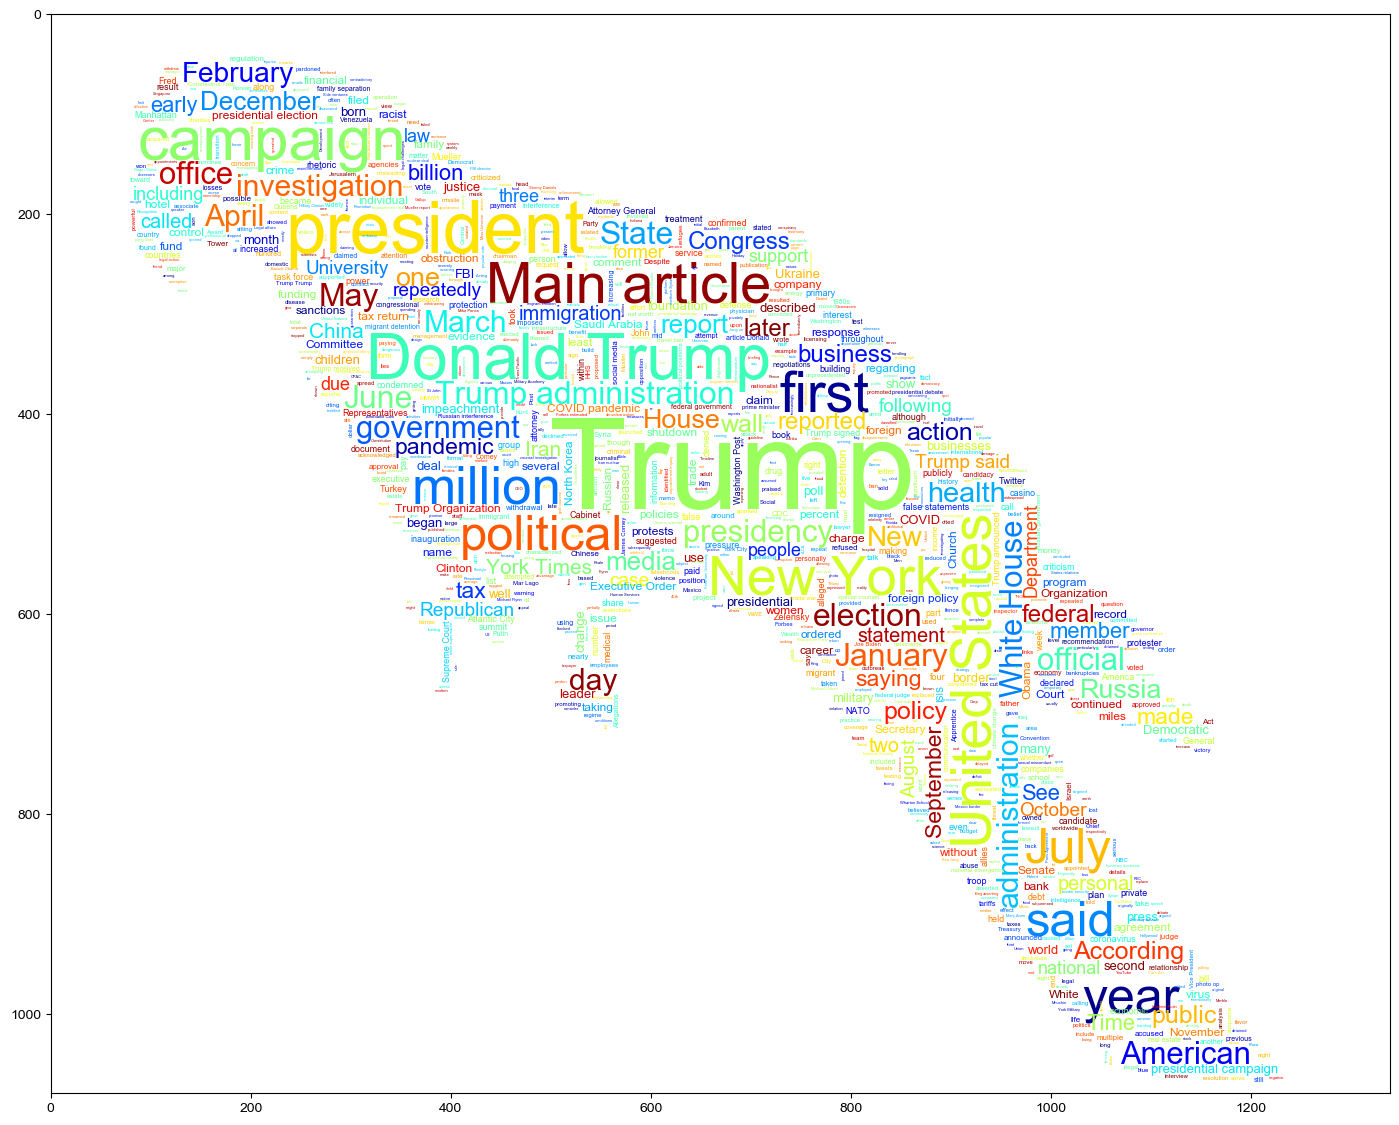

In [5]:
ax=plotWordCloud(wc,bkcolor='w')
# ax.axis('off')
plt.savefig('test.pdf',facecolor='k')
plt.show()

In [41]:
text=open('Data/wordcloud/alice.txt').read()
mask=np.array(Image.open('Data/wordcloud/alice_mask.png'))

wc=WordCloud(mask=mask, colormap='jet', max_words=2000, font_path='Arial')
wc.generate(text)

(0.0, 900.0, 900.0, 0.0)

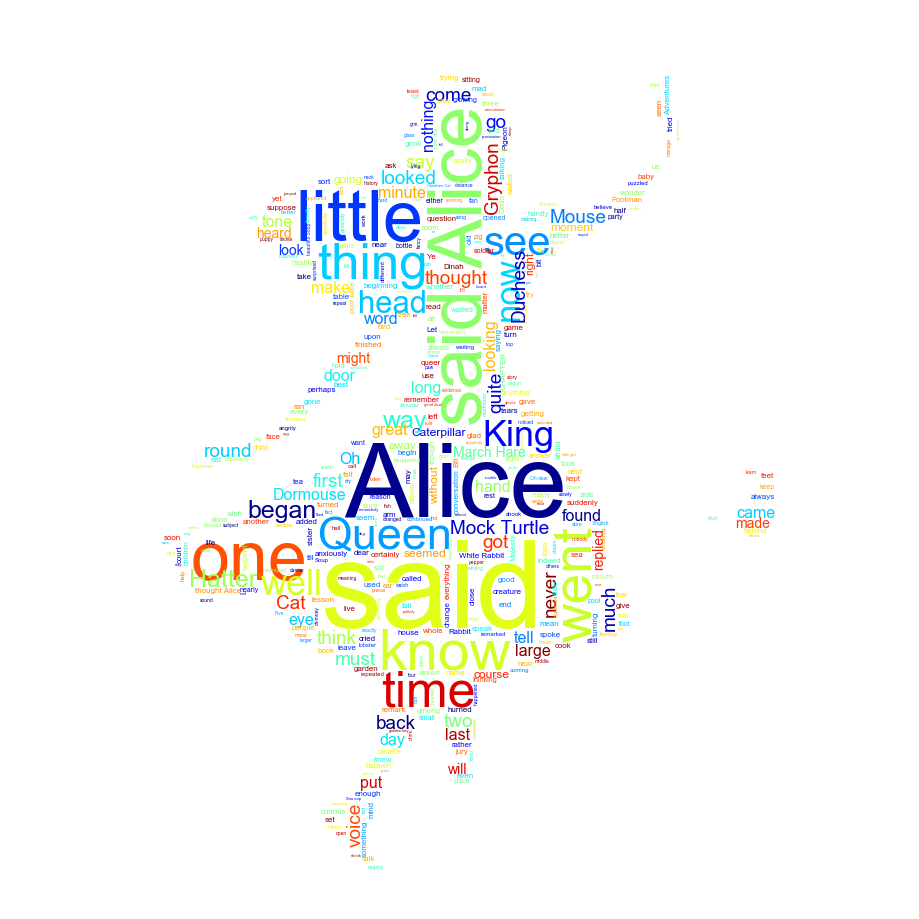

In [43]:
ax=plotWordCloud(wc,bkcolor='w')
ax.axis('off')

In [9]:
text=open('Data/wordcloud/Trump.txt').read()
mask_bird=np.array(Image.open('Data/wordcloud/parrot-by-jose-mari-gimenez2.jpg'))
mask_bird=mask_bird[::3, ::3]
mask=mask_bird.copy()
mask[mask_bird.sum(axis=2) == 0] = 255

wc=WordCloud(mask=mask, colormap='jet', max_words=2000, font_path='Arial')
wc.generate(text)

image_colors = ImageColorGenerator(mask_bird)
wc.recolor(color_func=image_colors)


(0.0, 1339.0, 1079.0, 0.0)

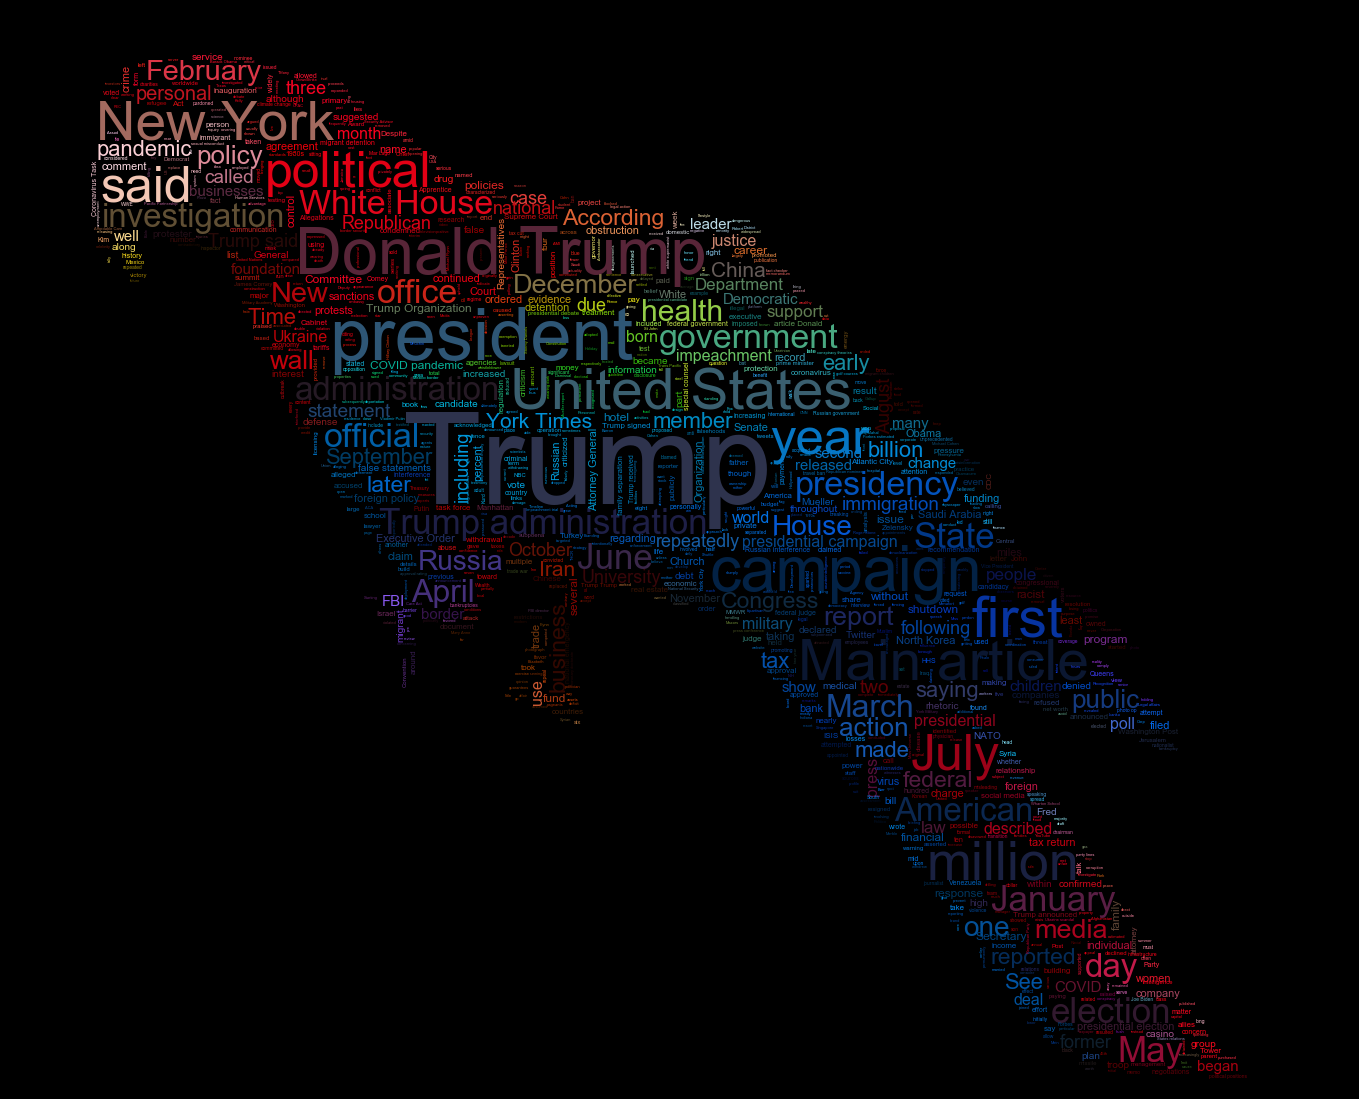

In [11]:
ax=plotWordCloud(wc,bkcolor='k')
ax.axis('off')